# FSU obtain of Arctic/BS Underway ship data

- erddap source: https://coastwatch.pfeg.noaa.gov/erddap
- 2010+
- BS/NBS/Chuckhi

Vessels returned with following advanced search
- https://coastwatch.pfeg.noaa.gov/erddap/search/advanced.html?page=1&itemsPerPage=1000&searchFor=fsuNoaaShip&protocol=%28ANY%29&cdm_data_type=%28ANY%29&institution=%28ANY%29&ioos_category=%28ANY%29&keywords=%28ANY%29&long_name=%28ANY%29&standard_name=sea_water_temperature&variableName=%28ANY%29&maxLat=86.0&minLon=163.0&maxLon=216.0&minLat=50.0&minTime=2010-1-1&maxTime=

fsuNoaaShipWTEBnrt *skip for now* | fsuNoaaShipWTEPnrt *skip for now* | fsuNoaaShipWTEFnrt *skip for now* | fsuNoaaShipWTDO  **no data in region** | fsuNoaaShipWTDL **no data in region** | fsuNoaaShipWTEF **GOA only** | fsuNoaaShipWTED **GOA only** | fsuNoaaShipWTEB ***NBS/Arctic*** | fsuNoaaShipWTEO **no data in region** | fsuNoaaShipWTDF **no data in region** | fsuNoaaShipWTEJ ***BS*** | fsuNoaaShipWTDM ***BS*** | fsuNoaaShipWTER **no data in region**
fsuNoaaShipWTEP ***BS/NBS/Arctic***| fsuNoaaShipWTEE **no data in region** | fsuNoaaShipWTEG **GOA only** | fsuNoaaShipWTEC ***BS/NBS/Arctic*** | fsuNoaaShipWTEA **no data in region**

In [1]:
import datetime
from erddapy import ERDDAP
import pandas as pd
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cmocean

#using xarray for bathymetry data read
import xarray as xa

In [4]:
#search and boundary parameters

server_url = 'https://coastwatch.pfeg.noaa.gov/erddap/'

ships = [
'fsuNoaaShipWTEB', #bering/NBS
'fsuNoaaShipWTEJ',
'fsuNoaaShipWTDM',
'fsuNoaaShipWTEP',
'fsuNoaaShipWTEC']

constraints = {
    'time>=': '2010-01-01T00:00:00Z',
    'time<=': datetime.datetime.utcnow().strftime('%Y-%m-%dT00:00:00Z'),
}

variables = ['latitude, longitude, seaTemperature, time']

extent=[-179.5, -150, 52.5, 72]


In [ ]:
#example single ship data retrieval
e = ERDDAP(server=server_url,
    protocol='tabledap',
    response='csv'
)

e.dataset_id='fsuNoaaShipWTEP'
e.constraints=constraints
e.variables=variables
df = e.to_pandas(
                index_col='time (UTC)',
                parse_dates=True,
                skiprows=(1,)  # units information can be dropped.
                )
df.columns = [x[1].split()[0] for x in enumerate(df.columns)]

In [5]:
#topo if wanted
map_server_url = 'https://coastwatch.pfeg.noaa.gov/erddap/griddap/usgsCeSS111'
bathy = xa.open_dataset(map_server_url) 
bathy_sub = bathy.sel(latitude=slice(extent[3],extent[2]),longitude=slice(extent[0],extent[1]))


def make_map(projection=ccrs.PlateCarree()):
    """subroutine to specify basemap"""
    fig, ax = plt.subplots(figsize=(12,12),
                           subplot_kw=dict(projection=projection))
    if projection == ccrs.PlateCarree():
        gl = ax.gridlines(draw_labels=True)
        gl.xlabels_top = gl.ylabels_right = False
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

NameError: name 'df' is not defined

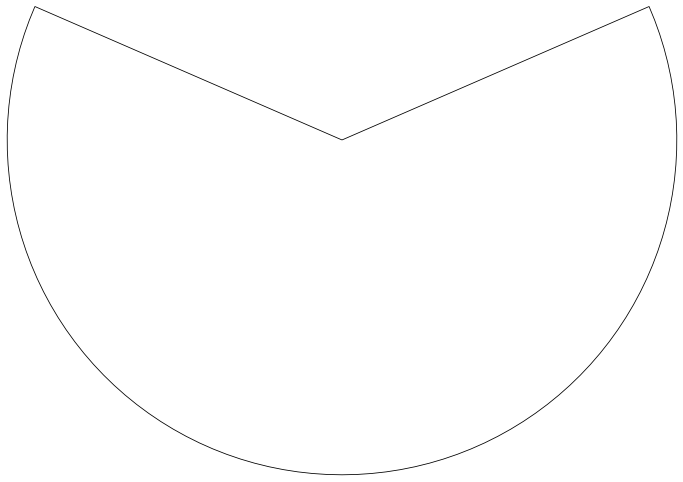

In [6]:
#make maps
projection=ccrs.LambertConformal(central_longitude=-160.0)
transformation=ccrs.PlateCarree()

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                                edgecolor='face',
                                                facecolor='1.0')

fig,ax = make_map(projection=projection)

c = ax.scatter(df.longitude, df.latitude, s=10,
               c=df.seaTemperature, cmap=cmocean.cm.thermal,
               vmin=-2, vmax=15,
               transform=transformation)
plt.colorbar(c)
ax.add_feature(land_50m)
ax.coastlines(resolution='10m')
ax.set_extent(extent)

In [ ]:
#all valid ships in region based

for ship in ships:
    try:
        e = ERDDAP(server=server_url,
            protocol='tabledap',
            response='csv'
        )

        e.dataset_id=ship
        e.constraints=constraints
        e.variables=variables
        df = e.to_pandas(
                        index_col='time (UTC)',
                        parse_dates=True,
                        skiprows=(1,)  # units information can be dropped.
                        )
        df.columns = [x[1].split()[0] for x in enumerate(df.columns)]
    except:
        print('Failed to ingest {}'.format(ship))
        
    ###plot ship data
    projection=ccrs.LambertConformal(central_longitude=-160.0)
    transformation=ccrs.PlateCarree()

    land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                                    edgecolor='face',
                                                    facecolor='1.0')

    fig,ax = make_map(projection=projection)

    c = ax.scatter(df.longitude, df.latitude, s=10,
                   c=df.seaTemperature, cmap=cmocean.cm.thermal,
                   vmin=-2, vmax=15,
                   transform=transformation)
    plt.colorbar(c)
    ax.add_feature(land_50m)
    ax.coastlines(resolution='10m')
    ax.set_extent(extent)

    fig.savefig(ship+'.png',dpi=300)
    
    df.to_csv(ship+'.csv')

Failed to ingest fsuNoaaShipWTEB
